In [1]:
import matplotlib.pyplot as plt, numpy as np, fitmodel, ldac
%matplotlib inline

In [2]:
cat1 = ldac.openObjectFile('/afs/ir.stanford.edu/class/physics100/materials/statsHW/prob1.cat', 'OBJECTS')

In [3]:
cat1.keys()

['Obs', 'flux', 'fluxerr']

In [4]:
len(cat1)

30

In [5]:
Obs = cat1['Obs']
flux = cat1['flux'];
fluxerr = cat1['fluxerr'];

Part I:
each cell represents the answer to a part a),b), etc.

In [6]:
unw_mean = np.mean(flux)
print unw_mean

19951.5


In [7]:
median = np.median(flux)
print median

19973.3


In [8]:
unw_mean_error = np.mean(fluxerr)
print unw_mean_error

139.144


In [9]:
variance = np.sum((flux - unw_mean)**2) /30   ;
print variance

16926.2885417


In [10]:
weight = (flux - unw_mean)**(-2)

In [11]:
w_mean = (np.sum(weight*flux))/(np.sum(weight))
print w_mean

19949.8


In [12]:
w_mean_error = np.mean(weight*fluxerr)/np.sum(weight)
print w_mean_error

4.99258


In [13]:
w_variance = np.sum((flux - w_mean)**2) /30   ;
print w_variance

16929.221875


Part II

Part a), i) and ii):

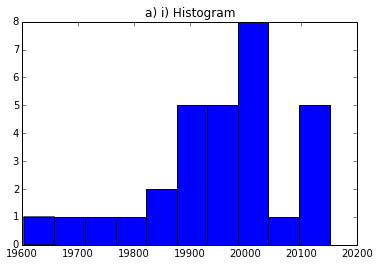

In [14]:
plt.hist(flux)
plt.title('a) i) Histogram')
plt.show()

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


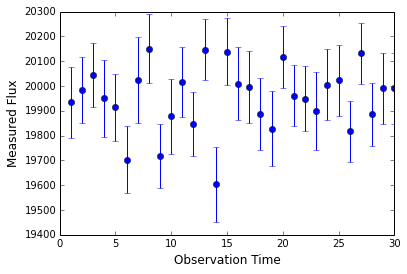

In [15]:
plt.errorbar(Obs, flux, fluxerr, fmt='bo')
plt.xlabel('Observation Time', fontsize=12)
plt.ylabel('Measured Flux', fontsize=12)

Part II b):

In [16]:
fit = fitmodel.FitModel(Obs, flux, fluxerr, fitmodel.LinearModel)

In [17]:
fit.fit()

fval = 27.1437, nfcn 36
fval = 27.1437, nfcn 26
Fit parameters : 
{'a1': 1.5680547355026038, 'a0': 19929.80211282751}


i) The best chisq value:

In [18]:
chisq = fit.statval
print chisq / 30

0.904788489854


ii) The probability that the chisq value would be randomly greater than this for our model is 51%:

In [19]:
prob = fitmodel.chisq_exceeds_prob(chisq, len(fit.xdata)-2)
print prob

0.510434921664


2 iv):

In [20]:
fit.fit()

fval = 27.1437, nfcn 22
fval = 27.1437, nfcn 20
Fit parameters : 
{'a1': 1.5680547355026038, 'a0': 19929.80211282751}


In [21]:
print '1 sigma: '
fit.uncert()
print '2 sigma:'
fit.uncert(nsigma=2.0)

1 sigma: 
Hesse errors : 
{'a1': 2.891363462387529, 'a0': 52.03082271670599}
Parameter errors :
{'a1': (-2.891363643712059, 2.891363642099613), 'a0': (-52.03082517757412, 52.03082515248167)}
2 sigma:
Hesse errors : 
{'a1': 2.891363432529353, 'a0': 52.03082231656432}
Parameter errors :
{'a1': (-5.782727425896784, 5.782727423746712), 'a0': (-104.06165226310708, 104.061652229648)}


We see that the best parameters are (a1,a0) = (1.57, 19929.80), with the 68% confidence errors (2.89, 52.03) and 95% confidence errors (5.78, 104.06).

v) They do, as the average error is approx. pm150, and the error in a0 is pm104.

c) The constant fit is a0=19929, whereas the mean in Part 1 was 19951.5, and the weighted mean was 19949.8 .

Part III

In [22]:
cat3 = ldac.openObjectFile('/afs/ir.stanford.edu/class/physics100/materials/statsHW/prob3.cat', 'OBJECTS')

In [23]:
cat3.keys()

['Obs', 'flux', 'fluxerr', 'plane', 'guard']

In [24]:
Obs3 = cat3['Obs']
flux3 = cat3['flux'];
fluxerr3 = cat3['fluxerr'];

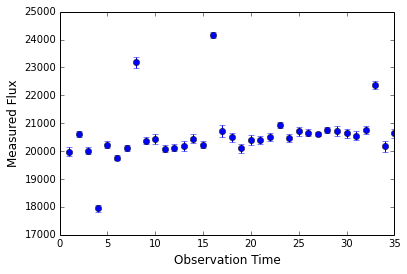

In [25]:
plt.errorbar(Obs3, flux3, fluxerr3, fmt='bo')
plt.xlabel('Observation Time', fontsize=12)
plt.ylabel('Measured Flux', fontsize=12)

We notice we can fit a more or less constant line through the data, albeit with 4 off-beat points, which we will now try to remove.

In [26]:
flux3 - np.mean(flux3)

array([ -601.71679688,    25.15820312,  -574.14648438, -2640.00585938,
        -349.65039062,  -820.06835938,  -472.10351562,  2595.0625    ,
        -219.84960938,  -152.97460938,  -494.9765625 ,  -463.16015625,
        -388.6953125 ,  -142.49609375,  -347.90820312,  3575.53515625,
         131.0859375 ,   -95.50976562,  -490.55664062,  -185.1171875 ,
        -198.84179688,   -79.00976562,   356.6328125 ,  -104.81640625,
         126.98828125,    74.92382812,    22.50976562,   157.26757812,
         128.77148438,    50.38867188,   -34.79296875,   179.99023438,
        1792.40625   ,  -409.93164062,    49.66992188], dtype=float32)

We see that numbers 3, 7, 15, and 32 are away from the fitted line.

In [27]:
flux3n = np.array([ 19982.25976562,  20609.13476562,  20009.83007812,
        20234.32617188,  19763.90820312,  20111.87304688, 
        20364.12695312,  20431.00195312,  20089.        ,  20120.81640625,
        20195.28125   ,  20441.48046875,  20236.06835938, 
        20715.0625    ,  20488.46679688,  20093.41992188,  20398.859375  ,
        20385.13476562,  20504.96679688,  20940.609375  ,  20479.16015625,
        20710.96484375,  20658.90039062,  20606.48632812,  20741.24414062,
        20712.74804688,  20634.36523438,  20549.18359375,  20763.96679688,
         20174.04492188,  20633.64648438])

In [28]:
Obs3n = np.array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [29]:
fluxerr3n= np.array([ 172.32226562,  100.82170868,  130.17703247,
        131.75033569,   86.1938858 ,  118.19112396,
        124.14914703,  175.12004089,  133.35482788,  125.93624878,
        177.06370544,  153.75135803,  120.6158371 ,
        207.56411743,  164.42152405,  146.74269104,  168.94770813,
        138.79148865,  133.95170593,  109.96796417,  139.24775696,
        155.47406006,  118.68584442,   79.00463867,  104.94870758,
        181.63783264,  160.68136597,  154.2532959 ,  139.79205322,
        203.4548645 ,  170.70794678])

III. a) The new graph is:

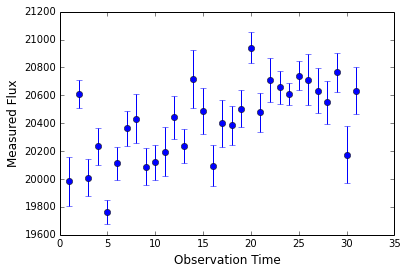

In [30]:
plt.errorbar(Obs3n, flux3n, fluxerr3n, fmt='bo')
plt.xlabel('Observation Time', fontsize=12)
plt.ylabel('Measured Flux', fontsize=12)

In [31]:
fit3 = fitmodel.FitModel(Obs3n, flux3n, fluxerr3n, fitmodel.LinearModel)

In [32]:
fit3.fit()

fval = 93.2119, nfcn 36
fval = 93.2119, nfcn 22
Fit parameters : 
{'a1': 23.017330493035956, 'a0': 20052.058555360898}


The best fit parameters are A = 23.017330493035956, B = 20052.058555360898  .

In [33]:
chisq3 = fit3.statval
print chisq3 / 35

2.663197458


In [34]:
prob3 = fitmodel.chisq_exceeds_prob(chisq3, len(fit3.xdata)-2)
print prob3

1.15716109252e-08


In [35]:
print '1 sigma: '
fit3.uncert()
print '2 sigma:'
fit3.uncert(nsigma=2.0)

1 sigma: 
Hesse errors : 
{'a1': 2.6439982815752527, 'a0': 46.83393821454298}
Parameter errors :
{'a1': (-2.643998352038001, 2.6439983526805073), 'a0': (-46.83393941533881, 46.83393942853668)}
2 sigma:
Hesse errors : 
{'a1': 2.6439982839184446, 'a0': 46.83393846053809}
Parameter errors :
{'a1': (-5.2879967153133265, 5.287996716170316), 'a0': (-93.66787900733642, 93.66787902492027)}


III. C) D) We see the probability for chi to be modified by random fluctuations is  1.15716109252e-08, extremely small. The 1sigma and 2sigma errors are also very small, compared to the absolute value.

III. E) If we plot Log(flux) as a function of time, then indeed the chisq test is reliable.

Part IV.

In [36]:
cat4 = ldac.openObjectFile('/afs/ir.stanford.edu/class/physics100/materials/statsHW/prob4.cat', 'OBJECTS')

In [37]:
cat4.keys()

['mass1', 'mass2', 'mass2err']

In [38]:
mass1 = cat4['mass1']
mass2 = cat4['mass2']
mass2err = cat4['mass2err']

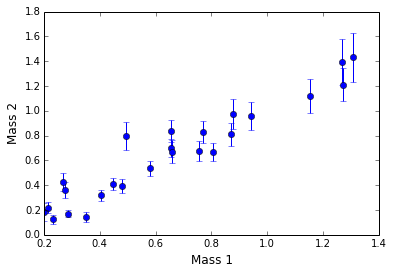

In [39]:
plt.errorbar(mass1, mass2, mass2err, fmt='bo')
plt.xlabel('Mass 1', fontsize=12)
plt.ylabel('Mass 2', fontsize=12)

4.a) We would expect that m1 and m2 vary linearly with each other (with a proportionaly constant close to 1), and a small constant factor.

4.b) We indeed see that a1=1.0955223869773536 and a0= -0.09785081059701362 below:

In [40]:
fit4 = fitmodel.FitModel(mass1, mass2, mass2err, fitmodel.LinearModel)

In [41]:
fit4.fit()

fval = 62.5238, nfcn 32
fval = 62.5238, nfcn 20
Fit parameters : 
{'a1': 1.0955223869773536, 'a0': -0.09785081059701362}


In [44]:
chisq4 = fit4.statval
print chisq4 /  25

2.50095069674


In [ ]:
prob4 = fitmodel.chisq_exceeds_prob(chisq4, len(fit4.xdata)-2)
print prob4

Both the chisq value and the probability for it to change due to random fluctuations is small, so the constant+linear term is a good description.